In [1]:
import numpy as np
from collections import OrderedDict
import h5py
import importlib

In [2]:
# %run "DataView Current-Dataset Check.py"

In [3]:
1e13/3600/24/365/1000

317.09791983764586

In [4]:
N = 1
def ChangeDS(NewWorkingName):
    global N
    global WorkingName
    global FullOutArray
    global Errors
    global HasData
    global Runtimes
    global A0Range
    global KD1Range
    global KD2Range
    global Kp
    global TimePoints
    global SpeciesCount
    global Delta
    global Deg
    
    WorkingName = NewWorkingName
    
    try:
        del FullOutArray
    except:
        pass

    File = h5py.File("./{}{}.h5".format(N, WorkingName), "r")
    if N == 1:
        CD = importlib.import_module("{}{}".format("",WorkingName))
    else:
        CD = importlib.import_module("{}{}".format(N-1,WorkingName))

    FullOutArray = File["Results"][:]
    FullOutArray = FullOutArray[::-1,::-1,:,:,:]


    Errors = File["Errors"][:]
    HasData = File["HasData"][:]
    Runtimes = File["Runtimes"][:]
    A0Range = File["A0Range"][:]
    Delta = CD.Delta
    Deg = Delta

    KD1Range = File["KD1Range"][:]
    KD1Range = KD1Range[::-1]

    KD2Range = File["KD2Range"][:]
    KD2Range = KD2Range[::-1]

    Kp = File["Kp"][()]
    TimePoints = CD.KeepTimePoints
    SpeciesCount = CD.SpeciesCount
    print "Working Name: {}".format(WorkingName)
    print "Shape: {}".format(Errors.shape)
    print "Errors: {}".format(np.sum(Errors==True))
    print "HasData: {}".format(np.sum(HasData==True))

In [5]:
%%time
DataSetName = "STV2StaticT"
# DataSetName = "STV2SynDeg28e-04T"
ChangeDS(DataSetName)
WorkingName = DataSetName[4:-1]
print FullOutArray[50,50,1,-1,-1]

Working Name: STV2SynDeg28e-04T
Shape: (100, 100)
Errors: 0
HasData: 1344000000
5.80861124376e-14
CPU times: user 3.37 s, sys: 15.2 s, total: 18.5 s
Wall time: 18.6 s


In [6]:
"{:.1e}".format(1/3600.0)

'2.8e-04'

In [172]:
Species = 10

In [173]:
# TT = np.argmax(TimePoints > 1.00000000e+12)
TT = np.argmax(TimePoints > 3600.0)
# TT = len(TimePoints)-1
print ("{} : {:.2e}".format(TT, TimePoints[TT]))

111 : 1.00e+12


In [174]:
import MPLGUI as MP
%matplotlib inline

In [175]:
from scipy.stats import rankdata

In [176]:
A0Target = np.argmax(A0Range>4e-6)
print (A0Target)

73


In [177]:
%%time 
# Figure Settings
ImgFileName = "{}_FracPlot_Conc_Species_{}_TP_{:.2e}.pdf".format(WorkingName, Species, TimePoints[TT])
Title       = "{} : Species {} : TP {:.2e}".format(WorkingName, Species, TimePoints[TT])
XAxisLabel  = 'Initial Concentration (M)'


Static = FullOutArray[:,:,:,TT,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = A0Range
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]

StaticFlat = np.array([Static[:,:,i].reshape(10000) for i in range(len(A0Range))])

CPU times: user 126 ms, sys: 65 µs, total: 126 ms
Wall time: 125 ms


In [178]:
StaticFlat[:,8000].shape

(100,)

CPU times: user 8.34 s, sys: 23.3 ms, total: 8.36 s
Wall time: 8.39 s


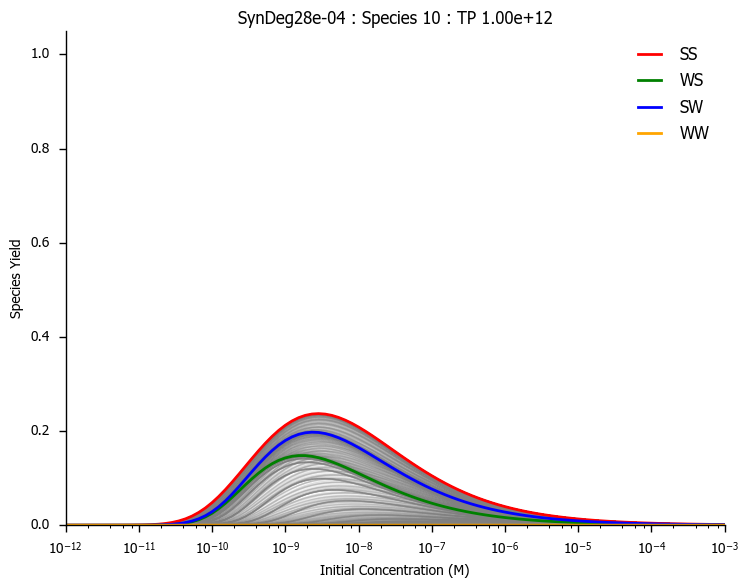

In [179]:
%%time
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(StaticFlat[0,:]),8):
    MainPlot.AddLine(
        XAxisPoints,
        StaticFlat[:,i],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    StaticFlat[:,9999],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlat[:,99],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlat[:,9900],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlat[:,0],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )

In [180]:
StaticFlat[:,8000].shape

(100,)

In [181]:
%%time 
# Figure Settings
ImgFileName = "{}_RankPlot_Species_{}_TP_{:.2e}.pdf".format(WorkingName, Species, TimePoints[TT])
Title       = "{} : Species {} : TP {:.2e}".format(WorkingName, Species, TimePoints[TT])
XAxisLabel  = 'Initial Concentration (M)'

# ChangeDS("STV3StaticT")
# Static = FullOutArray[:,:,1,:,Species]
# YAxisLabel  = 'Assembly Efficiency Rank'
YAxisLabel  = 'Species Yield'
XAxisPoints = A0Range
XLim = [np.min(XAxisPoints),np.max(XAxisPoints)]
# YAxisPoints = [x[-1,-1] for x in DSS.values()]
# YLim = [np.min(YAxisPoints),np.max(YAxisPoints)]
StaticFlatRanked = np.array([rankdata(Static[:,:,i], method='ordinal') for i in range(len(A0Range))])

CPU times: user 163 ms, sys: 0 ns, total: 163 ms
Wall time: 162 ms


In [182]:
StaticFlatRanked[:,0].shape

(100,)

CPU times: user 13.6 s, sys: 7.08 ms, total: 13.6 s
Wall time: 13.6 s


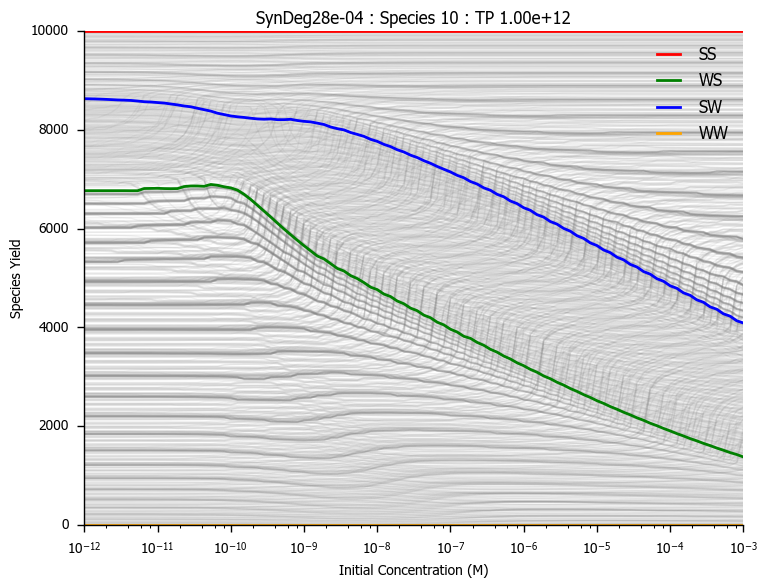

In [183]:
%%time
LineWidth = 2.0
MainPlot = MP.LinePlot(
    Width="double",
    YAxisInPercent = False
    );

for i in range(0,len(StaticFlat[0,:]),8):
    MainPlot.AddLine(
        XAxisPoints,
        StaticFlatRanked[:,i],
#         label="SS",
        color="grey",
    #     clip_on=True,
        alpha=0.1,
    #     marker = "o",
        zorder=0
        )

MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,9999],
    label="SS",
    color="red",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,99],
    label="WS",
    color="green",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,9900],
    label="SW",
    color="blue",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
MainPlot.AddLine(
    XAxisPoints,
    StaticFlatRanked[:,0],
    label="WW",
    color="orange",
#     clip_on=True,
#     alpha=0.5,
#     marker = "o",
    zorder=1,
    linewidth = LineWidth
    )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_B[XBounds]/B0,
#     label="B",
#     color="Blue",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=1
#     )
# MainPlot.AddLine(
#     XAxisPoints,
#     OtO_AB[XBounds]/np.min([A0,B0]),
#     label="AB",
#     color="Green",
#     clip_on=False,
# #     alpha=0.5,
#     zorder=0
#     )

LegendAdjust = (15.0, -10.0)
MainPlot.AddLegend(
    loc = "best",
#     loc = "lower right",
#     loc = "upper right",
    labelspacing = 0.5
    )

MainPlot.SetXRange(XLim[0],XLim[1])

# MainPlot.SetYRange(0.0,1.05)

# MainPlot.SetYRange(0.0, 1.05)

MainPlot.XLabel(XAxisLabel)
MainPlot.YLabel(YAxisLabel)
MainPlot._Plot.set_title(Title)
# MainPlot.ChangeYAxis(lambda x, p: format(x, '2.0e'))
# MainPlot.ChangeXAxis(lambda x, p: format(x, '2.0e'))

MainPlot._MainFig.show()
MainPlot.SaveFig(ImgFileName,
                 bbox_inches = 'tight',
                 transparent=True
                )